In [94]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

import warnings 
warnings.filterwarnings('ignore')

In [95]:
df=pd.read_csv("HR_Employee.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [96]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [97]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [99]:
df.shape

(1470, 35)

In [100]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [101]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

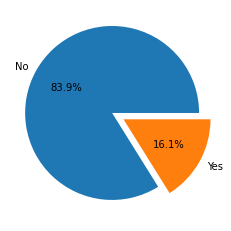

In [102]:
i=df.groupby('Attrition')['Attrition'].count()
plt.pie(i, labels=['No', 'Yes'],explode=[0.05, 0.1],autopct='%1.1f%%');

<AxesSubplot:xlabel='Age'>

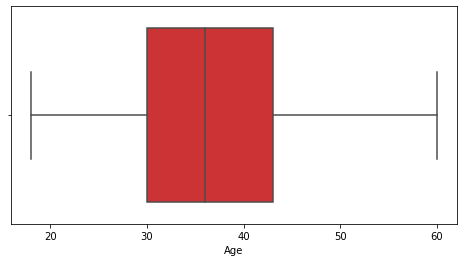

In [103]:
fig = plt.subplots(figsize=(8,4))
sns.boxplot(palette = "Set1",  x=df['Age'])

<AxesSubplot:ylabel='Density'>

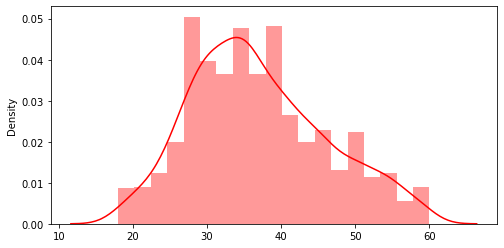

In [104]:
fig=plt.subplots(figsize=(8,4))
sns.distplot(x=df["Age"], color="red")

<AxesSubplot:ylabel='Density'>

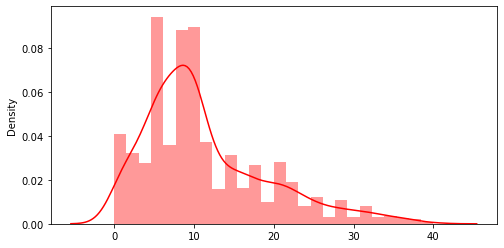

In [105]:
fig=plt.subplots(figsize=(8,4))
sns.distplot(x=df["TotalWorkingYears"], color="red")

<AxesSubplot:ylabel='Density'>

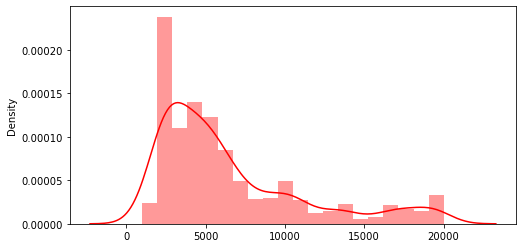

In [106]:
fig=plt.subplots(figsize=(8,4))
sns.distplot(x=df["MonthlyIncome"], color="red")

<AxesSubplot:ylabel='Density'>

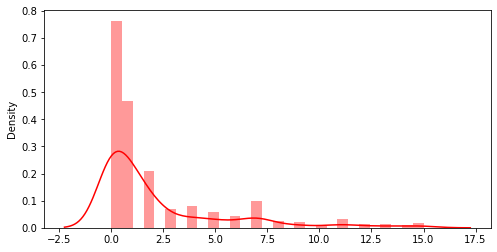

In [107]:
fig=plt.subplots(figsize=(8,4))
sns.distplot(x=df["YearsSinceLastPromotion"], color="red")

<AxesSubplot:>

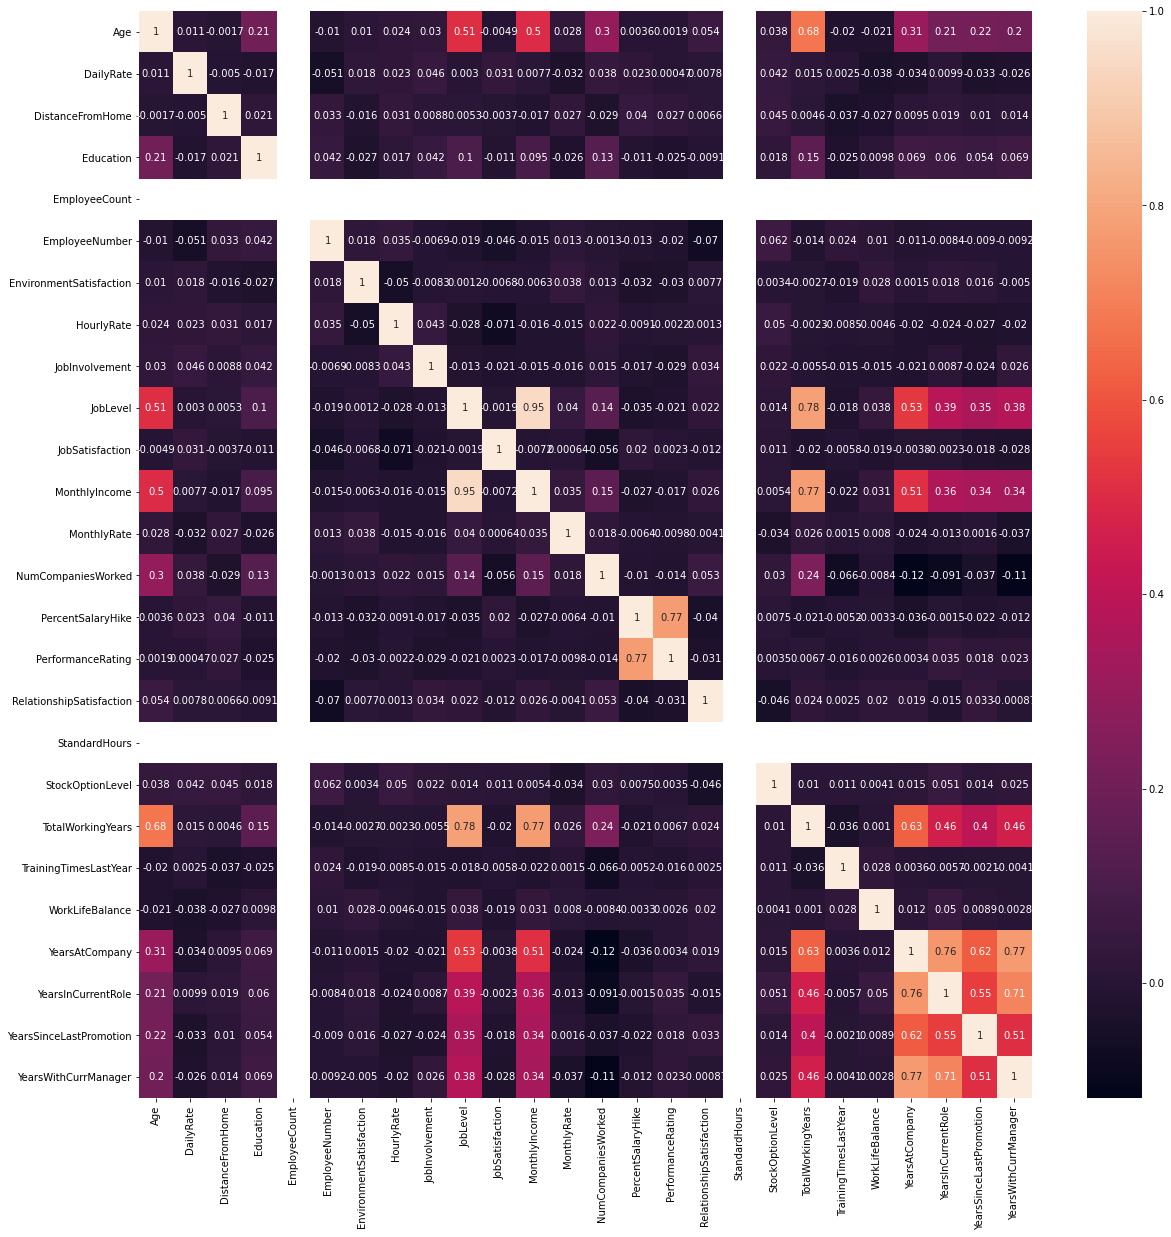

In [108]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

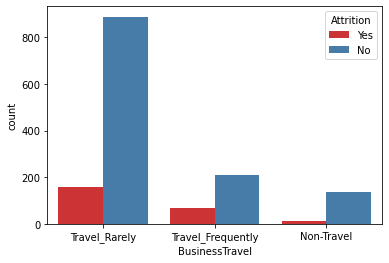

In [109]:
sns.countplot(data=df, x='BusinessTravel',palette = "Set1", hue='Attrition');

<AxesSubplot:xlabel='Gender', ylabel='count'>

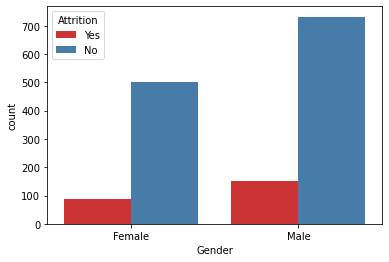

In [110]:
sns.countplot(data=df, x="Gender",palette="Set1", hue="Attrition")

<AxesSubplot:xlabel='JobRole', ylabel='count'>

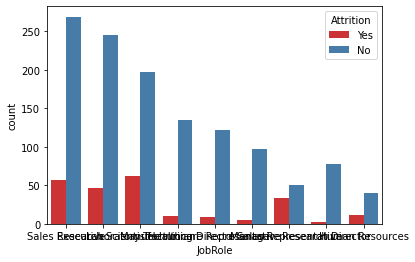

In [111]:
sns.countplot(data=df, x="JobRole",palette="Set1", hue="Attrition")

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

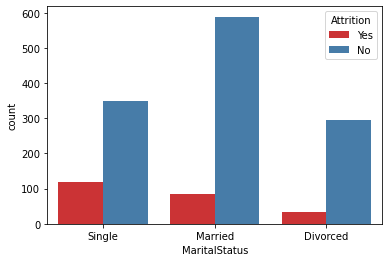

In [112]:
sns.countplot(data=df, x="MaritalStatus",palette="Set1", hue="Attrition")

<AxesSubplot:xlabel='OverTime', ylabel='count'>

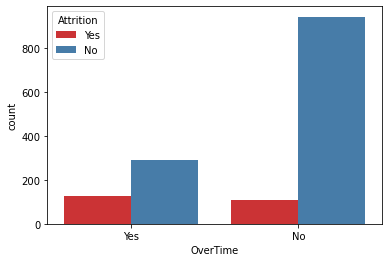

In [113]:
sns.countplot(data=df, x="OverTime",palette="Set1", hue="Attrition")

<AxesSubplot:xlabel='Over18', ylabel='count'>

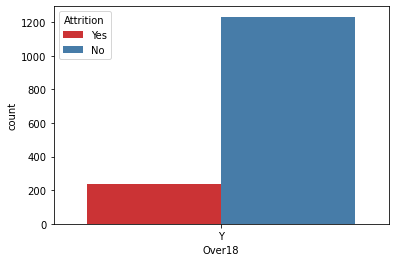

In [114]:
sns.countplot(data=df, x="Over18",palette="Set1", hue="Attrition")

In [115]:
x=df.drop(['Attrition'],axis=1)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [116]:
y=df['Attrition']
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [117]:
x.shape

(1470, 34)

In [118]:
y.shape

(1470,)

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [120]:
x_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
75,31,Travel_Rarely,746,Research & Development,8,4,Life Sciences,1,98,3,...,4,80,0,11,2,3,11,7,1,8
325,31,Travel_Frequently,798,Research & Development,7,2,Life Sciences,1,442,3,...,1,80,1,10,2,3,10,9,8,9
1313,29,Travel_Rarely,350,Human Resources,13,3,Human Resources,1,1844,1,...,4,80,3,4,3,3,2,2,2,0
218,45,Non-Travel,1052,Sales,6,3,Medical,1,302,4,...,4,80,0,23,2,3,19,7,12,8
874,30,Travel_Rarely,853,Research & Development,7,4,Life Sciences,1,1224,3,...,1,80,3,10,4,2,10,7,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,40,Travel_Rarely,575,Sales,22,2,Marketing,1,492,3,...,1,80,2,8,6,3,6,4,1,0
48,46,Travel_Frequently,1211,Sales,5,4,Marketing,1,62,1,...,3,80,0,14,4,3,9,6,0,8
772,56,Travel_Frequently,1240,Research & Development,9,3,Medical,1,1071,1,...,2,80,1,18,4,3,5,4,0,3
1231,46,Travel_Rarely,717,Research & Development,13,4,Life Sciences,1,1727,3,...,4,80,0,19,3,3,10,7,0,9


In [121]:
x_train.shape

(1176, 34)

In [122]:
x_test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
427,60,Travel_Frequently,1499,Sales,28,3,Marketing,1,573,3,...,4,80,0,22,5,4,18,13,13,11
1210,33,Travel_Rarely,267,Research & Development,21,3,Medical,1,1698,2,...,4,80,3,14,6,3,14,11,2,13
771,54,Travel_Rarely,1082,Sales,2,4,Life Sciences,1,1070,3,...,2,80,1,13,4,3,9,4,7,0
1126,50,Travel_Rarely,264,Sales,9,3,Marketing,1,1591,3,...,3,80,1,27,2,3,1,0,0,0
750,44,Travel_Rarely,1448,Sales,28,3,Medical,1,1039,4,...,3,80,1,23,2,3,12,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,31,Travel_Rarely,1062,Research & Development,24,3,Medical,1,1252,3,...,2,80,0,10,2,3,10,9,1,8
282,29,Travel_Frequently,442,Sales,2,2,Life Sciences,1,388,2,...,1,80,0,10,3,2,10,7,0,9
36,50,Travel_Rarely,869,Sales,3,2,Marketing,1,47,1,...,3,80,0,3,2,3,3,2,0,2
1156,40,Travel_Rarely,884,Research & Development,15,3,Life Sciences,1,1628,1,...,4,80,2,18,2,3,18,15,14,12


In [123]:
x_test.shape

(294, 34)

In [124]:
y_train

75       No
325      No
1313    Yes
218      No
874      No
       ... 
368     Yes
48       No
772      No
1231     No
969      No
Name: Attrition, Length: 1176, dtype: object

In [125]:
y_train.shape

(1176,)

In [126]:
y_test

427      No
1210     No
771      No
1126     No
750      No
       ... 
896      No
282      No
36      Yes
1156     No
740      No
Name: Attrition, Length: 294, dtype: object

In [127]:
y_test.shape

(294,)

In [128]:
lg=LogisticRegression()

In [129]:
lg.fit(x_train,y_train)

ValueError: could not convert string to float: 'Travel_Rarely'

In [ ]:
pred=lg.predict(x_test)
print(pred)